In [1]:
import numpy as np
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import glob

# Reading in files/pretreating data

In [42]:
file_list = []

In [41]:
scan_rates = []

In [43]:
electrode_mass = []

# BioLogic cycling/cap retention

In [18]:
long_cycling = pd.read_table('E:echem_test_files/Fiber_1_Na2SO4_lifetime_test_4th_02_CVA_C01.txt')

In [20]:
def biologic_cap_retention(data):
    
    cycle_number = data['cycle number'].unique()
    potential_window = max(data['Ewe/V']) - min(data['Ewe/V'])
    
    charge_list = []
    charge = data[data['<I>/mA'] > 0]
    for n in cycle_number:
        charge_cap = np.trapz(
            charge['<I>/mA'][charge['cycle number'] == n].to_numpy(), 
            charge['time/s'][charge['cycle number'] == n].to_numpy())
        charge_list.append(charge_cap)

    discharge_list = []
    discharge = data[data['<I>/mA'] < 0]
    for n in cycle_number:
        discharge_cap = np.trapz(
            discharge['<I>/mA'][discharge['cycle number'] == n].to_numpy(), 
            discharge['time/s'][discharge['cycle number'] == n].to_numpy())
        discharge_list.append(np.abs(discharge_cap))

    coulombic_eff = np.array(charge_list) / np.array(discharge_list) * 100
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax2 = ax.twinx()
    
    ax.plot(cycle_number, 
            np.array(discharge_list)/ max(discharge_list) * 100,
            markersize=12,
            marker='o')
    
    ax2.plot(cycle_number, 
             coulombic_eff,
             markersize=12,
             marker='o',
             color='red')
    
    ax.set_ylim(0, 110)
    ax2.set_ylim(0, max(coulombic_eff) * 1.1)
    
    ax.tick_params(labelsize=18, width=2, length=5)
    
    ax2.tick_params(axis='y', labelsize=18, width=2, length=5,  colors='red')
    ax2.spines['right'].set_color('red')
    
    ax.set_xlabel('Cycle number', fontsize=24)
    ax.set_ylabel('Capacitance retention (%)', fontsize=24)
    ax2.set_ylabel('Coulombic Efficiency',
                   fontsize=24,
                   rotation=270,
                   labelpad=20,
                   color='red'
                  )

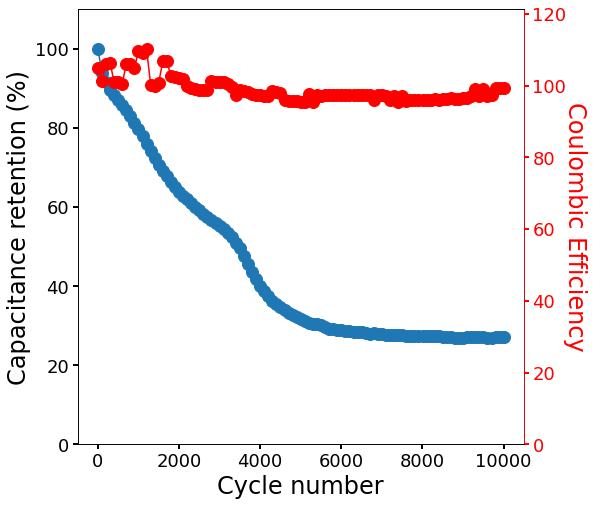

In [21]:
biologic_cap_retention(long_cycling)

# Autolab capacity/C.E.

In [2]:
# calc capacity fade for single scan rate

def autolab_capacity_CE (data, sample_mass):
    
    cycle_number = data['Scan'].unique() 
    
    charge_list = []
    charge = data[data['WE(1).Current (A)'] > 0]
    for n in cycle_number:
        charge_cap = np.trapz(
            charge['WE(1).Current (A)'][charge['Scan'] == n].to_numpy(), 
            charge['Time (s)'][charge['Scan'] == n].to_numpy())
        charge_list.append(charge_cap)
    charge_capacity = np.array(charge_list) / (sample_mass * 3.6)

    discharge_list = []
    discharge = data[data['WE(1).Current (A)'] < 0]
    for n in cycle_number:
        discharge_cap = np.trapz(
            discharge['WE(1).Current (A)'][discharge['Scan'] == n].to_numpy(), 
            discharge['Time (s)'][discharge['Scan'] == n].to_numpy())
        discharge_list.append(np.abs(discharge_cap))
    discharge_capacity = np.array(discharge_list) / (sample_mass * 3.6)
    
    coulombic_eff = charge_capacity / discharge_capacity * 100
    
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax2 = ax.twinx()
    
    ax.plot(cycle_number, charge_capacity,
            label='charge',
            color='tab:blue',
            marker='o',
            linewidth=2,
            linestyle='--', 
            markersize=12,
            markerfacecolor='white'
           )
    
    ax.plot(cycle_number, discharge_capacity,
            label='discharge',
            color='tab:blue',
            marker='o',
            linewidth=2,
            linestyle='--', 
            markersize=12
           )
    
    ax2.plot(cycle_number, coulombic_eff, 
             linewidth=2, 
             color='red'
            )
        
    ax.legend(fontsize=18,
              loc='lower left',
             frameon=False)
    
    ax.set_ylim(1, max(discharge_capacity) * 1.1)
    ax2.set_ylim(1, 110)
    
    ax.tick_params(labelsize=18, width=2, length=5)
    
    ax2.tick_params(axis='y', labelsize=18, width=2, length=5,  colors='red')
    ax2.spines['right'].set_color('red')

    
    ax.set_xticks(np.arange(0, len(cycle_number), 5))
    
    ax.set_xlabel('Cycle number', fontsize=24)
    ax.set_ylabel('Capacity (mAh/g)', fontsize=24)
    ax2.set_ylabel('Coulombic Efficiency',
                   fontsize=24,
                   rotation=270,
                   labelpad=20,
                   color='red'
                  )


In [3]:
data = pd.read_table('E:tis2_LiClO4_higher_mass_second.txt', delimiter=',')

C:\Users\Tyler\AppData\Local\Temp/ipykernel_12984/1850944932.py:25: RuntimeWarning: divide by zero encountered in true_divide
  coulombic_eff = charge_capacity / discharge_capacity * 100


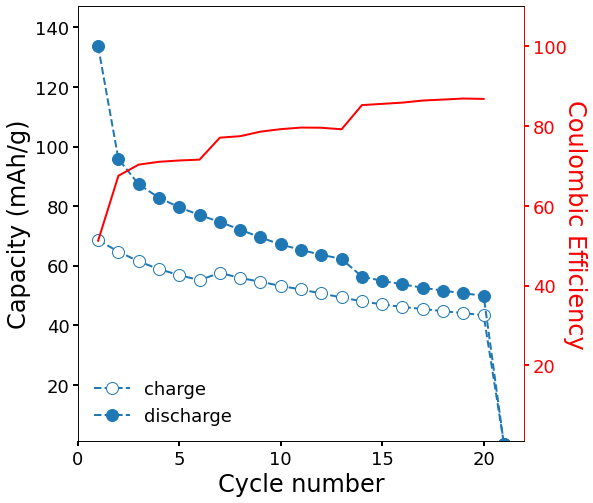

In [4]:
autolab_capacity_CE(data, sample_mass=8.958e-05)